In [212]:
#Importing Libraries
import math
from requests import get

In [214]:
class CountingBloomFilter():
    """Implement the counting bloom filter which supports:
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter
    - Calcualte_fpr: calculates the false positive rate
    - Calculate_memory_size: calculates the memory size/ length of the filter
    """
    def __init__(self, number_of_hash_functions=10, filter_length =10): 
        """
        Initializes a new instance of the CountingBloomFilter class.

        Args:
            number_of_hash_functions (int): The number of hash functions to use.
            filter_length (int): The length of the filter.
        """
        self.number_of_hash_functions = number_of_hash_functions
        self.filter_length = filter_length
        self.filter = [0] * self.filter_length 
        
    def hash_cbf(self, item):
        """
        Calculates the hash values for a given item.
        A loop will run for the number of hash functions and each time it will calculate a hash value for the item.
        ord gives the ASCII value of a character.

        Args:
            item (str): The item to hash.

        Returns:
            list: A list of hash values.
        """
        
        hash_value = []
        for hash_function in range(self.number_of_hash_functions):
            if hash_function > 0: 
                hash_2 = (sum(ord(c) * (index**hash_function) for index, c in enumerate(item))) % self.filter_length
                hash_value.append(hash_2)

            else:#else is use 2nd to save comparisions = number_of_hash_functions -1 
                hash_1 = len(item) % self.filter_length 
                hash_value.append(hash_1)
        return hash_value



    def search(self, item):
        """
        Checks if an item is possibly in the set.

        Args:
            item (str): The item to search for.

        Returns:
            bool: True if the item is possibly in the set, False otherwise.
        """
        
        hash_value= self.hash_cbf(item)
        for hash in hash_value:
            if self.filter[hash] == 0: 
                return False
        #True only if all the bits at the hash values are 1.
        return True 

    def insert(self, item):
        """
        Inserts an item into the set.

        Args:
            item (str): The item to insert.
        """

        hash_value= self.hash_cbf(item)
        for hash in hash_value:
            self.filter[hash] += 1 #This works as counter too


    def delete(self, item):
        """
        Removes an item from the set, and reduces counter.

        Args:
            item (str): The item to remove.
        """
        
        hash_value= self.hash_cbf(item)
        for hash in hash_value:
            self.filter[hash] -= 1
    
    def calculate_fpr(self, number_of_items):
        """
        Calculates the false positive rate of the Counting Bloom Filter.
        This uses a formula from (Kirsch & Mitzenmacher, 2008).
        Args:
            number_of_items (int): The number of items in the set.

        Returns:
            float: The false positive rate.
        """
        k = self.number_of_hash_functions
        m = self.filter_length
        n = number_of_items
        p = math.e**(-k * n / m) 
        # The false positive rate is then 1 - p
        fpr = (1 - p)**k
        return fpr
    

    def calculate_memory_size(fpr, number_of_items, number_of_hash_functions):
        """
        Calculates the memory size of the Counting Bloom Filter.
        Uses the formuls from (Kirsch & Mitzenmacher, 2008).
        Args:
            fpr: float, false-positive rate
            number_of_items: int, number of items stored
            number_of_hash_functions: int, number of hash functions

        Returns:
            int, memory size
        """
        k = number_of_hash_functions
        n = number_of_items
        memory_size = -k * n / math.log(1 - fpr**(1/k))
        return memory_size


### Testing the Counting Bloom Filter class

In [215]:
def test_insert():
    cbf = CountingBloomFilter(2)  # Creating an instance of the CBF class with 2 hash functions
    item = "test_string"
    cbf.insert(item)
    hash_values = cbf.hash_cbf(item)
    #print(hash_values)
    #print(cbf.filter)
    for hash_value in hash_values:
        assert cbf.filter[hash_value] > 0, f"Item {item} was not inserted correctly"

test_insert()

def test_search():
    cbf = CountingBloomFilter(10)  # Creating an instance of the CBF class with 10 hash functions
    item = "test_string"
    cbf.insert(item)
    #print(cbf.filter)
    assert cbf.search(item), f"Item {item} was not found correctly"

test_search()

def test_delete():
    cbf = CountingBloomFilter(20) #Testing with 20 hash functions
    item = "This is a test string with special characters like !, @, #, $, %, ^, &,, and numbers 7,3,3,2,2,2 "
    cbf.insert(item)
    #Since, we added the item, it's hash value must be present in the filter, so we will search for it.
    assert cbf.search(item), f"Item {item} was not found correctly"
    cbf.delete(item)
    #Now the filter should have 0 at all the hash values of the item.
    assert not cbf.search(item), f"Item {item} was not deleted correctly"

test_delete()

#Testing if the counter works after adding 10 items
def test_counter():
    cbf = CountingBloomFilter(10) #Testing with 10 hash functions
    for i in range(10):
        item = str(i-1)+ "test_string" + str(i)
        cbf.insert(item)
        print(cbf.hash_cbf(item))
    #Since, we added multiple 10 elements with each element having 10 hash values, the counter should be more than 1 for multiple hash values.
    return cbf.filter
test_counter()

[4, 3, 9, 7, 7, 3, 9, 7, 7, 3]
[3, 2, 0, 4, 0, 2, 0, 4, 0, 2]
[3, 4, 4, 2, 6, 4, 4, 2, 6, 4]
[3, 6, 8, 0, 2, 6, 8, 0, 2, 6]
[3, 8, 2, 8, 8, 8, 2, 8, 8, 8]
[3, 0, 6, 6, 4, 0, 6, 6, 4, 0]
[3, 2, 0, 4, 0, 2, 0, 4, 0, 2]
[3, 4, 4, 2, 6, 4, 4, 2, 6, 4]
[3, 6, 8, 0, 2, 6, 8, 0, 2, 6]
[3, 8, 2, 8, 8, 8, 2, 8, 8, 8]


[15, 0, 18, 12, 17, 0, 14, 4, 18, 2]

### Experimental Analysis

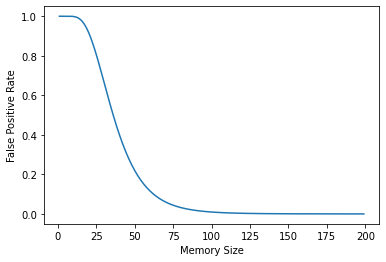

In [216]:
import requests
import matplotlib.pyplot as plt

def fpr_with_memory_size():
    """
    Number of Hash functions is constant i.e.10.
    """
    X = []
    Y = []
    url = "https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/"
    data = requests.get(url).text.splitlines() 
    for size in range(1, 200):
        cbf = CountingBloomFilter(10, size+1) 
        for i in range(size):
            if i < len(data):
                cbf.insert(data[i]) 
        fpr = cbf.calculate_fpr(10)
        X.append(size)
        Y.append(fpr)
    plt.plot(X, Y)
    plt.xlabel("Memory Size")
    plt.ylabel("False Positive Rate")
    plt.show()

fpr_with_memory_size()

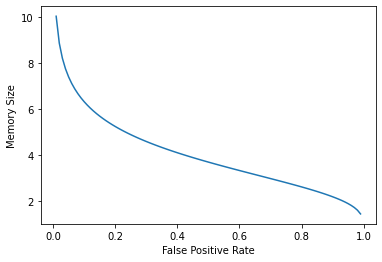

In [217]:
import requests
import matplotlib.pyplot as plt

def memory_size_with_fpr():
    """
    This function plots the memory size of a Counting Bloom Filter against the false positive rate (FPR).
    The number of items is determined by the number of lines in the data fetched from a specific URL.
    The number of hash functions is set to 10.
    The FPR is varied from 0.01 to 0.99.
    """
    X = []
    Y = []
    url = "https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/"
    data = requests.get(url).text.splitlines()
    number_of_items = len(data) 
    number_of_hash_functions = 10 
    for fpr in [i * 0.01 for i in range(1, 100)]: 
        memory_size = CountingBloomFilter.calculate_memory_size(fpr, number_of_items, number_of_hash_functions)
        X.append(fpr)
        Y.append(memory_size)
    plt.plot(X, Y)
    plt.xlabel("False Positive Rate")
    plt.ylabel("Memory Size")
    plt.show()

memory_size_with_fpr()

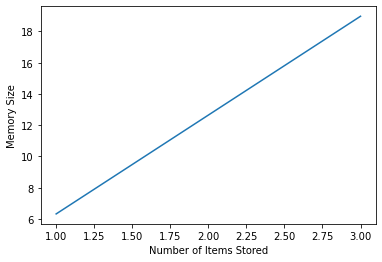

In [220]:
def memory_size_with_number_of_items():
    """
    This function plots the memory size of a Counting Bloom Filter against the number of items stored.
    The number of items is determined by the number of lines in the data fetched from a specific URL.
    The false positive rate (FPR) is set to 0.1.
    The number of hash functions is set to 10.
    """
    X = []
    Y = []
    fpr = 0.1
    number_of_hash_functions = 10
    url = "https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/"
    data = requests.get(url).text.split() 
    for number_of_items in range(1, len(data) + 1): 
        memory_size = CountingBloomFilter.calculate_memory_size(fpr, number_of_items, number_of_hash_functions)
        X.append(number_of_items)
        Y.append(memory_size)
    plt.plot(X, Y)
    plt.xlabel("Number of Items Stored")
    plt.ylabel("Memory Size")
    plt.show()

memory_size_with_number_of_items()

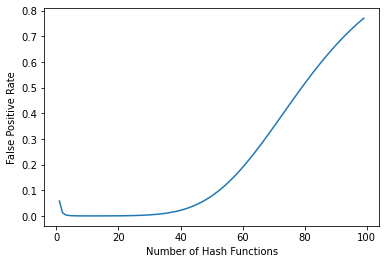

In [227]:
def fpr_with_hash_functions():
    """
    This function plots the false positive rate of a Counting Bloom Filter against the number of hash functions used.
    The number of items is determined by the number of lines in the data fetched from a specific URL.
    The filter length is set to 1000.
    """
    X = []
    Y = []
    filter_length = 50
    url = "https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/"
    data = requests.get(url).text.split()
    number_of_items = len(data)
    for number_of_hash_functions in range(1, 100):
        cbf = CountingBloomFilter(number_of_hash_functions, filter_length)
        for item in data:
            cbf.insert(item)
        fpr = cbf.calculate_fpr(number_of_items)
        X.append(number_of_hash_functions)
        Y.append(fpr)
    plt.plot(X, Y)
    plt.xlabel("Number of Hash Functions")
    plt.ylabel("False Positive Rate")
    plt.show()

fpr_with_hash_functions()

In [264]:
#Tried Keeping the FPR constant, but takes a long time to run.
"""def access_time_with_number_of_items():
    
    #This function plots the access time of a Counting Bloom Filter against the number of items stored.
    #The number of items, filter length, and number of hash functions are determined based on the data fetched from a specific URL.
    
    X = []
    Y = []
    base_filter_length = 5
    base_number_of_hash_functions = 1
    url = "https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/"
    print("Fetching data...")
    data = requests.get(url).text.splitlines()
    print(len(data))
    for number_of_items in range(1, len(data) + 1): 
        # Increase the filter length and no of hash functions proportionally to the number of items
        filter_length = int(base_filter_length / int((number_of_items)**0.00000001))
        number_of_hash_functions = base_number_of_hash_functions * int((number_of_items)**0.00000002)
        cbf = CountingBloomFilter(number_of_hash_functions, filter_length)
        for item in data[:number_of_items]:
            cbf.insert(item)
        start_time = time.time()
        cbf.search('random_element')
        end_time = time.time()
        access_time = end_time - start_time
        X.append(number_of_items)
        Y.append(access_time)
    plt.plot(X, Y)
    plt.xlabel("Number of Items Stored")
    plt.ylabel("Access Time (Seconds)")
    plt.show()

access_time_with_number_of_items()"""

'def access_time_with_number_of_items():\n    \n    #This function plots the access time of a Counting Bloom Filter against the number of items stored.\n    #The number of items, filter length, and number of hash functions are determined based on the data fetched from a specific URL.\n    \n    X = []\n    Y = []\n    base_filter_length = 5\n    base_number_of_hash_functions = 1\n    url = "https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/"\n    print("Fetching data...")\n    data = requests.get(url).text.splitlines()\n    print(len(data))\n    for number_of_items in range(1, len(data) + 1): \n        # Increase the filter length and no of hash functions proportionally to the number of items\n        filter_length = int(base_filter_length / int((number_of_items)**0.00000001))\n        number_of_hash_functions = base_number_of_hash_functions * int((number_of_items)**0.00000002)\n        cbf = CountingBloomFilter(nu

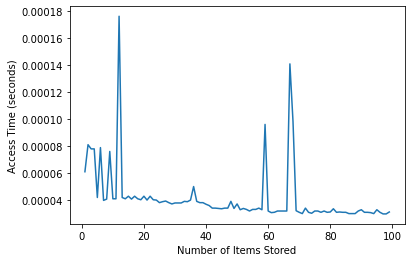

In [268]:
#Without Constant FPR

def access_time_with_number_of_items():
    X = []
    Y = []
    filter_length = 100 
    number_of_hash_functions = 10 
    for number_of_items in range(1, 100): 
        cbf = CountingBloomFilter(number_of_hash_functions, filter_length) 
        for item in range(number_of_items):
            cbf.insert(str(item))
        start_time = time.time()
        cbf.search('random_text')
        end_time = time.time()
        access_time = end_time - start_time
        X.append(number_of_items)
        Y.append(access_time)
    plt.plot(X, Y)
    plt.xlabel("Number of Items Stored")
    plt.ylabel("Access Time (seconds)")
    plt.show()

access_time_with_number_of_items()

In [77]:
#Code provided in the Assignmnet Instructions
#! pip install requests
url_version_1 = 'https://bit.ly/39MurYb'
url_version_2 = 'https://bit.ly/3we1QCp'
url_version_3 = 'https://bit.ly/3vUecRn'
def get_txt_into_list_of_words(url):
    '''Cleans the text data
    Input
    ----------
    url : string
        The URL for the txt file.
    Returns
    -------
    data_just_words_lower_case: list
        List of "cleaned-up" words sorted by the order they appear in the original file.
    '''
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', '(', ')', '*']
    data = get(url).text
    data = ''.join(c for c in data if c not in bad_chars)
    data_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in data)
    data_just_words = [word for word in data_without_newlines.split(" ") if word != ""]
    data_just_words_lower_case = [word.lower() for word in data_just_words]
    return data_just_words_lower_case
version_1 = get_txt_into_list_of_words(url_version_1)
version_2 = get_txt_into_list_of_words(url_version_2)
version_3 = get_txt_into_list_of_words(url_version_3)

(8461, 8461, 8554)

In [115]:
class PlagiarismDetector(CountingBloomFilter):
    def __init__(self, num_hash_functions, memory_size):
        super().__init__(num_hash_functions, memory_size)

    def add_text(self, text, n_value):
        words = text
        for i in range(len(words) - n_value + 1):
            ngram = ' '.join(words[i:i+n_value])
            self.insert(ngram)

    def check_plagiarism(self, text, n_value):
        words = text
        plagiarized_ngrams = 0
        for i in range(len(words) - n_value + 1):
            ngram = ' '.join(words[i:i+n_value])
            if self.search(ngram):
                plagiarized_ngrams += 1
        plagiarism_rate = plagiarized_ngrams / (len(words) - n_value + 1)
        return plagiarism_rate
    def test_fpr(self, original_docs, non_plagiarized_docs, n_value):
        # Adding original text to the detector
        for doc in original_docs:
            self.add_text(doc, n_value)

        # Test the detector
        false_positives = 0
        for doc in non_plagiarized_docs:
            if self.check_plagiarism(doc, n_value) > 0:
                false_positives += 1

        # Calculate the FPR
        fpr = false_positives / len(non_plagiarized_docs)
        return fpr
    

def get_hash_count( m, n): 
    ''' 
    Returns the number of hash functions to be used
    m : int 
        filter length
    n : int 
        number of items expected to be stored in filter 
    '''
    k = (m/n) * math.log(2) 
    return int(k) 

def get_filter_size( n, fpr): 
        ''' 
        Return the size of bit array(m) to used using 
        following formula 
        m = -(n * lg(p)) / (lg(2)^2) 
        n : int 
            number of items expected to be stored in filter 
        fpr : float 
            False Positive probability in decimal 
        '''
        m = -(n * math.log(fpr))/(math.log(2)**2) 
        return int(m) 

# Example usage:
n_value = 10
filter_length = get_filter_size( len(version_1), 0.2) 
hash_count = get_hash_count(filter_length, len(version_1)) 
print(filter_length, hash_count)
detector = PlagiarismDetector(hash_count, filter_length)
detector.add_text(version_1, n_value)
print(detector.check_plagiarism(version_2, n_value))
print(detector.check_plagiarism(version_3, n_value))

28342 2
0.2546142924751538
0.2602691632533645


In [80]:
#Modified Code from Assignment Instructions for Text to list
def get_string_into_list_of_words(data):
    '''Cleans the text data
    Input
    ----------
    url : string
        The URL for the txt file.
    Returns
    -------
    data_just_words_lower_case: list
        List of "cleaned-up" words sorted by the order they appear in the original file.
    '''
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', '(', ')', '*']
    data = ''.join(c for c in data if c not in bad_chars)
    data_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in data)
    data_just_words = [word for word in data_without_newlines.split(" ") if word != ""]
    data_just_words_lower_case = [word.lower() for word in data_just_words]
    return data_just_words_lower_case


In [102]:
Original_text = "Hello I am Jeevan. I am a student at Minerva University. I am from Nepal."

Plagiarized_text = " I am Jeevan from Nepal and Minerva. I am passionate about learning."

random_text = "Identify what other algorithmic strategies could be implemented to detect plagiarism, and explain why. Be sure to make your comparison as thorough as possible, using any experimental analysis setup you deem appropriate."
original= get_string_into_list_of_words(Original_text)
plagiarized = get_string_into_list_of_words(Plagiarized_text)
random_t = get_string_into_list_of_words(random_text)
print(len(plagiarized), len(original))
n_value = 4
detector = PlagiarismDetector(2, 15)
detector.add_text(original,n_value)
print(detector.check_plagiarism(plagiarized, n_value))
print(detector.check_plagiarism(random_t, n_value))
print(detector.check_plagiarism(original, n_value))


12 15
0.2222222222222222
0.6206896551724138
1.0


### Test the False Positive Rate
Frequentist Approach

In [122]:
# Create an instance of the PlagiarismDetector
detector = PlagiarismDetector(2, 200)

# Define the n_value
n_value = 2

# Define multiple sets of original and non-plagiarized documents
tests = [
    {
        'original_docs': [
            ["this", "is", "the", "first", "original", "document"],
            ["this", "is", "the", "second", "original", "document"]
        ],
        'non_plagiarized_docs': [
            ["I", "have", "nothing", "to", "do", "with"],
            ["the", "original", "document", "I ", "am", "unique" ]
        ]
    },
    {
        'original_docs': [
            ["one", "more", "original", "document"],
            ["and", "another", "one"]
        ],
        'non_plagiarized_docs': [
            ["this", "document", "is", "not", "plagiarized"],
            ["neither", "is", "this", "one"]
        ]
    },
    # Add more tests as needed
]

# Run the tests and calculate the average FPR
total_fpr = 0
for test in tests:
    fpr = detector.test_fpr(test['original_docs'], test['non_plagiarized_docs'], n_value)
    total_fpr += fpr
average_fpr = total_fpr / len(tests)

print(average_fpr)

0.25


## Experimental Analysis for Plagiarism Detector

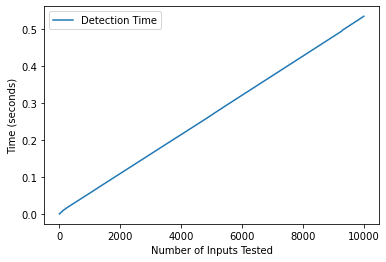

In [284]:
import random
import string
import time

def generate_random_text(length):
    return ''.join(random.choice(string.ascii_lowercase + ' ') for _ in range(length))

def experimental_analysis(detector, tests, n_value): 
    results = []
    input_count = 0
    for test in tests:
        check_time = 0
        for input_size in range (10000):
            # Generate a random text
            random_text = generate_random_text(len(test['original']))
            start_time = time.time()
            detector.add_text(test['original'], n_value) y
            train_time = time.time() - start_time

            # Test the detector
            start_time = time.time()
            plagiarism_rate = detector.check_plagiarism(test['plagiarized'], n_value)  # Pass n_value directly
            check_time += time.time() - start_time


            results.append({
                'input_count': input_count,
                'plagiarism_rate': plagiarism_rate,
                'train_time': train_time,
                'check_time': check_time
            })
            input_count += 1

    return results

tests = [
    {
        'original': get_string_into_list_of_words(Original_text),
        'plagiarized': get_string_into_list_of_words(Plagiarized_text),
    },
]


n_values = 4
detector = PlagiarismDetector(2, 15)


results = experimental_analysis(detector, tests, n_values)


plt.plot([result['input_count'] for result in results], [result['check_time'] for result in results], label='Detection Time')
plt.xlabel('Number of Inputs Tested')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

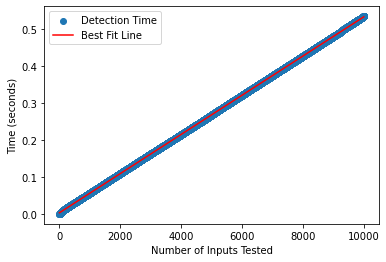

In [285]:
import numpy as np

# Scatter Plot
X = [result['input_count'] for result in results]
Y = [result['check_time'] for result in results]
plt.scatter(X, Y, label='Detection Time')

# Best fit line
coefficients = np.polyfit(X, Y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(X, polynomial(X), 'r-', label='Best Fit Line')

plt.xlabel('Number of Inputs Tested')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()